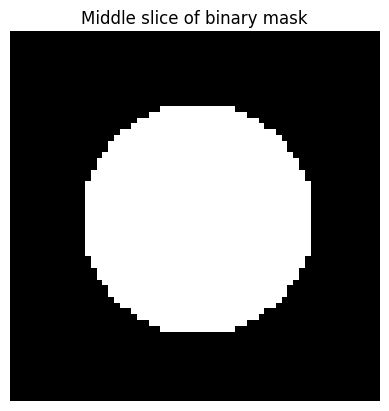

Meshing...
Running Lloyd smoothing... (up to 120s)
Running local optimization...
Nodes shape: (722, 3)
Elements shape: (3060, 5)
✅ Mesh created successfully.


In [ ]:
# ================================================================
# Build a simple binary volume (cylinder inside a box)
# and mesh it with the same settings your notebook used.
# ================================================================

import numpy as np
import matplotlib.pyplot as plt
import nirfasterff as ff

# -------------------------------------------------
# 1. Create a binary volume (64x64x16)
# -------------------------------------------------
Nx, Ny, Nz = 64, 64, 16
mask = np.zeros((Nx, Ny, Nz), dtype=np.uint8)

# Put a cylinder along z-axis (centered)
cx, cy, r = Nx//2, Ny//2, 20
for x in range(Nx):
    for y in range(Ny):
        if (x - cx)**2 + (y - cy)**2 < r**2:
            mask[x, y, :] = 1  # fill all z-slices at this (x,y)

# Quick visual slice
plt.imshow(mask[:, :, Nz//2], cmap='gray')
plt.title("Middle slice of binary mask")
plt.axis('off')
plt.show()

# -------------------------------------------------
# 2. Meshing parameters (copied from your notebook)
# -------------------------------------------------
params = ff.utils.MeshingParams()
params.facet_angle = 30
params.facet_size = 4.0
params.facet_distance = 1.0

# -------------------------------------------------
# 3. Run CGAL mesher EXACTLY like your notebook
# -------------------------------------------------
ele, nodes = ff.meshing.meshutils.RunCGALMeshGenerator(mask, opt=params)

print(f"Nodes shape: {nodes.shape}")
print(f"Elements shape: {ele.shape}")

# -------------------------------------------------
# 4. Build standard mesh object
# -------------------------------------------------
mesh = ff.base.stndmesh()
mesh.from_solid(ele, nodes)

print("✅ Mesh created successfully.")


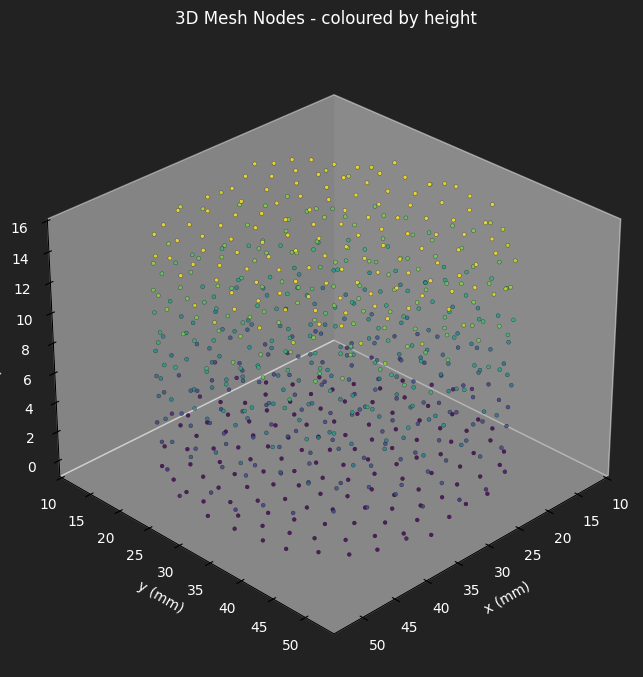

In [22]:
# ================================================================
# Fancier 3D scatter plot of the mesh nodes (to see full shape)
# ================================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Get node coordinates
x, y, z = nodes[:, 0], nodes[:, 1], nodes[:, 2]

# Colour by height (z)
col = cm.viridis((z - z.min()) / (z.max() - z.min()))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Fancy scatter with alpha & colour
sc = ax.scatter(x, y, z, c=col, s=8, alpha=0.8, edgecolor='k', linewidth=0.2)

# Make it look cool
ax.set_facecolor('#222222')
fig.patch.set_facecolor('#222222')
ax.grid(False)

ax.set_title("3D Mesh Nodes - coloured by height", color='white', pad=20)
ax.set_xlabel("x (mm)", color='white')
ax.set_ylabel("y (mm)", color='white')
ax.set_zlabel("z (mm)", color='white')

# Tweak the look of ticks
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()):
    label.set_color('white')

ax.view_init(elev=30, azim=45)  # rotate to see depth
plt.show()


(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

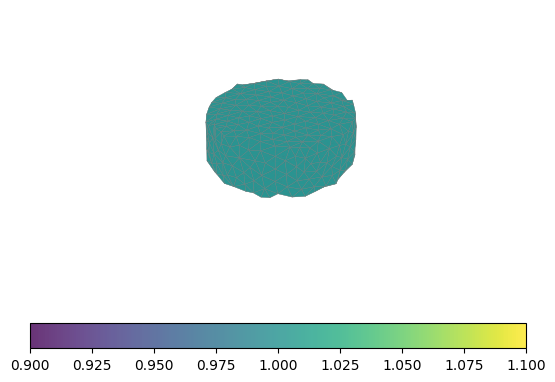

In [23]:
mesh = ff.base.stndmesh()
mesh.from_solid(ele, nodes)
# have a look
ff.visualize.plot3dmesh(mesh, mesh.region)